In this notebook I will do some basic portfolio optimisation and statistical analysis. 

My universe of securities is pretty short here (only 14 stocks), but you should get the idea. For better performence try to use a larger amount.

Also I have provided code to get financial data using different API (yahoo finance and quandl). But I like to work with yfinance =)


In [1]:
#pip install yfinance

In [2]:
#pip install quandl

In [3]:
#Import the libraries

import pandas as pd
import numpy as np
import requests
import random

import pandas_datareader.data as web
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf    #or quandl
import quandl
quandl.ApiConfig.api_key = "Your API key here" #set API key

# dates

all_data_start, all_data_end = '2016-01-01', '2021-01-01'

default_start, default_end = '2017-01-01', '2018-01-01'

In [4]:
#more comfortable function to get data from free source quandl, you just need your own api_key
cached_data = {}
def stock_hist(symbol, start = None, end = None):

  start = start if start else default_start
  end = end if end else default_end
  if not symbol in cached_data:
    cached_data[symbol] = web.DataReader('WIKI/' + symbol, 'quandl', all_data_start, all_data_end, api_key=quandl.ApiConfig.api_key)
    print(f"Loaded {symbol} num_values = {len(cached_data[symbol])}")
  return cached_data[symbol][end:start]

Loaded AAPL num_values = 560


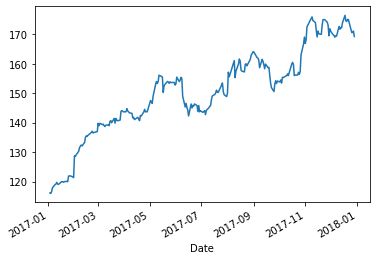

In [5]:
aapl = stock_hist('AAPL','2017-01-01', '2018-01-01')

aapl['Close'].plot()

In [6]:
#I usually use yahoo finance to get my financial data, so I prefer to work with it, but if you like quandl, I've provided the code above =)
#choose your dates and download your financial data

start_date = '2017-01-01'
end_date = datetime.date.today().strftime('%Y-%m-%d')

#Choose your universe
assets = ['AAPL', 'AMD', 'AMZN', 'NVDA', 'IBM', 'BABA', 'ZM', 'CVNA', 'ETSY', 'FB', 'NFLX', 'MSFT', 'GOOG', 'TSLA']
N = len(assets)
#Lets get the adjusted close price of our stocks and store it in dataframe
data = pd.DataFrame()

for stock in assets:
  data[stock] = web.DataReader(stock, data_source='yahoo', start = start_date, end = end_date)['Adj Close']

In [7]:
data.tail()

,AAPL,AMD,AMZN,NVDA,IBM,BABA,ZM,CVNA,ETSY,FB,NFLX,MSFT,GOOG,TSLA
Date,,,,,,,,,,,,,,
2021-04-08,130.360001,83.349998,3299.300049,572.679993,135.119995,228.240005,331.279999,271.000000,215.389999,313.019989,554.580017,253.250000,2265.439941,683.799988
2021-04-09,133.000000,82.760002,3372.199951,576.000000,135.729996,223.309998,322.649994,271.299988,218.570007,312.459991,555.309998,255.850006,2285.879883,677.020020
2021-04-12,131.240005,78.580002,3379.389893,608.359985,134.589996,244.009995,321.510010,269.279999,218.130005,311.540009,552.780029,255.910004,2254.790039,701.979980
2021-04-13,134.429993,80.190002,3400.000000,627.179993,131.179993,241.889999,342.750000,276.709991,224.029999,309.760010,553.729980,258.489990,2267.270020,762.320007
2021-04-14,133.128906,78.869904,3363.854980,621.220093,132.231705,241.539993,333.720001,276.407990,222.050003,304.119995,542.669983,256.760010,2266.080078,750.544983


In [8]:
#Assign weight to the stocks (must equal 1 in total)
#Just for this toy example I will assign the weights equally to all stocks in our security universe. 

weights = np.array([1/N]*N)

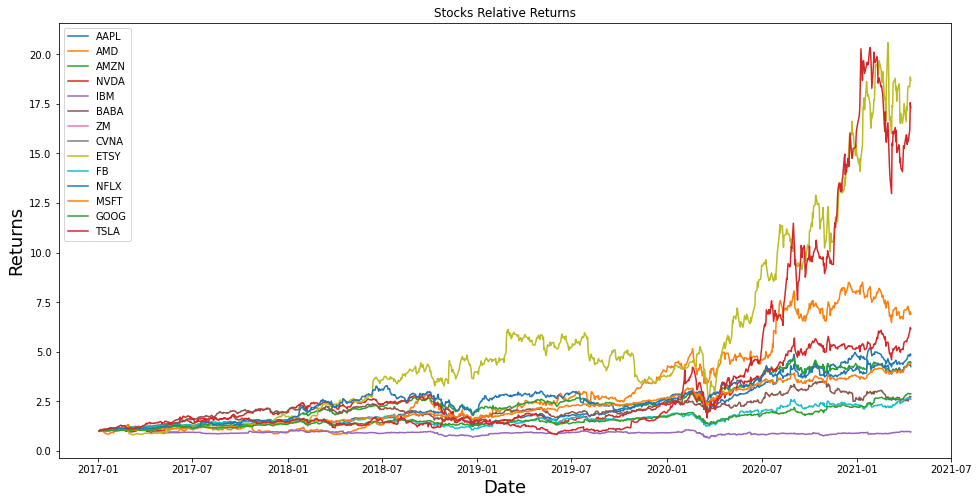

In [9]:
#Lets plot our Portfolio returns
title = 'Stocks Relative Returns'

r_returns = data/data.iloc[0]
plt.rcParams["figure.figsize"] = (16,8)
for r in r_returns.columns.values:
  plt.plot(r_returns[r], label = r)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Returns', fontsize = 18)
plt.legend(r_returns.columns.values, loc = 2)
plt.show()


In [10]:
#Daily simple return
returns = data.pct_change()
returns.head()

,AAPL,AMD,AMZN,NVDA,IBM,BABA,ZM,CVNA,ETSY,FB,NFLX,MSFT,GOOG,TSLA
Date,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,-0.001119,0.000000,0.004657,0.023331,0.012381,0.021558,NaN,NaN,0.007576,0.015660,0.015060,-0.004474,0.000967,0.046085
2017-01-05,0.005085,-0.016623,0.030732,-0.025385,-0.003308,0.042647,NaN,NaN,0.035923,0.016682,0.018546,0.000000,0.009048,-0.001057
2017-01-06,0.011148,0.007117,0.019912,0.013367,0.004920,-0.005086,NaN,NaN,0.054839,0.022707,-0.005614,0.008668,0.015277,0.009967
2017-01-09,0.009160,0.015018,0.001168,0.040543,-0.011090,0.008840,NaN,NaN,-0.055810,0.012074,-0.000916,-0.003183,0.000620,0.009912


In [11]:
#annualized covariance matrix
cov_matrix_annual = returns.cov()*252 #(trading days)
cov_matrix_annual

,AAPL,AMD,AMZN,NVDA,IBM,BABA,ZM,CVNA,ETSY,FB,NFLX,MSFT,GOOG,TSLA
AAPL,0.100458,0.089145,0.061866,0.092967,0.039422,0.054009,0.045906,0.103326,0.073373,0.066462,0.062079,0.067408,0.059010,0.082291
AMD,0.089145,0.338811,0.085457,0.175123,0.051590,0.074585,0.088626,0.170902,0.105825,0.077985,0.095269,0.081210,0.072249,0.116167
AMZN,0.061866,0.085457,0.092033,0.084295,0.029928,0.055866,0.069648,0.097903,0.075394,0.065375,0.077659,0.062927,0.057334,0.072390
NVDA,0.092967,0.175123,0.084295,0.226096,0.051737,0.086995,0.080579,0.153521,0.106744,0.089740,0.096045,0.090501,0.080441,0.119239
IBM,0.039422,0.051590,0.029928,0.051737,0.074009,0.030577,-0.021660,0.070070,0.037918,0.032831,0.029660,0.041793,0.038125,0.039246
BABA,0.054009,0.074585,0.055866,0.086995,0.030577,0.120005,0.058063,0.085856,0.065488,0.056472,0.061098,0.052601,0.050649,0.067539
ZM,0.045906,0.088626,0.069648,0.080579,-0.021660,0.058063,0.555733,0.137341,0.156519,0.035006,0.090767,0.043707,0.025038,0.125064
CVNA,0.103326,0.170902,0.097903,0.153521,0.070070,0.085856,0.137341,0.694765,0.205699,0.097246,0.112450,0.100841,0.089155,0.154632
ETSY,0.073373,0.105825,0.075394,0.106744,0.037918,0.065488,0.156519,0.205699,0.335244,0.067250,0.084287,0.071746,0.060624,0.094931
FB,0.066462,0.077985,0.065375,0.089740,0.032831,0.056472,0.035006,0.097246,0.067250,0.115007,0.068510,0.063081,0.065961,0.070615


In [12]:
#Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.08885700081946732

In [13]:
#Calculate the portfolio volatility aka SD
port_volatility = np.sqrt(port_variance)
port_volatility

0.29808891428476053

In [14]:
#Calculate the annual portfolio return
portfolio_simple_annual_return = np.sum(returns.mean() * weights) * 252
portfolio_simple_annual_return

0.5470496042118203

In [15]:
#Expected annual return, volatility (risk), variance

percent_var = str(round(port_variance, 2) * 100 ) + '%'
percent_vol = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolio_simple_annual_return, 2) * 100) + '%'

print('Expected annual return: ' + percent_ret)
print('Annual volatility/risk: ' + percent_vol)
print('Annual variance: ' + percent_var)

Expected annual return: 55.00000000000001%
Annual volatility/risk: 30.0%
Annual variance: 9.0%


#Portfolio Optimisation

In [16]:
#pip install PyPortfolioOpt

In [17]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

The sharpe ratio describes how much excess return you receive for the extra volatility you endure for holding a riskier asset.

for more information about the Sharpe Ratio follow this link: https://www.investopedia.com/articles/07/sharpe_ratio.asp​	

In [18]:
#Calculate the expected returns and the annualised sample cov matrix of esseats
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

#Optimise for max sharpe ratio 
ef = EfficientFrontier(mu, S)
weights_e = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights) 
ef.portfolio_performance(verbose = True)

OrderedDict([('AAPL', 0.13964), ('AMD', 0.0), ('AMZN', 0.0), ('NVDA', 0.0), ('IBM', 0.0), ('BABA', 0.0), ('ZM', 0.26643), ('CVNA', 0.12454), ('ETSY', 0.20231), ('FB', 0.0), ('NFLX', 0.0), ('MSFT', 0.07866), ('GOOG', 0.0), ('TSLA', 0.18842)])
Expected annual return: 98.5%
Annual volatility: 41.1%
Sharpe Ratio: 2.35


(0.9854844125936555, 0.41104459056918036, 2.348855658839186)

In [19]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(data)
weights = cleaned_weights
portfolio_val = 25000
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = portfolio_val)

allocation, leftover = da.lp_portfolio()

print('Discrete Allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete Allocation:  {'AAPL': 27, 'ZM': 20, 'CVNA': 11, 'ETSY': 23, 'MSFT': 8, 'TSLA': 6}
Funds remaining: $26.13


In [21]:
def get_company_name(symbol):
  url = 'http://d.yimg.com/autoc.finance.yahoo.com/autoc?query='+symbol+'&region+1&lang=en'
  result = requests.get(url).json()
  for r in result['ResultSet']['Result']:
    if r['symbol'] == symbol:
      return r['name']

In [22]:
#Store the company name into a list
#Get the discrete allocation values
company_name = []
discrete_allocation_list = []

for symbol in allocation:
  company_name.append(get_company_name(symbol))
  discrete_allocation_list.append(allocation.get(symbol))
  

In [23]:
#dataframe for portfolio
portfolio_df = pd.DataFrame(columns = ['Company_name', 'Company_Ticker', 'Discrete_val_' + str(portfolio_val)])

In [24]:
portfolio_df['Company_name'] = company_name
portfolio_df['Company_Ticker'] = allocation
portfolio_df['Discrete_val_' + str(portfolio_val)] = discrete_allocation_list

In [25]:
portfolio_df

,Company_name,Company_Ticker,Discrete_val_25000
0,Apple Inc.,AAPL,27
1,"Zoom Video Communications, Inc.",ZM,20
2,Carvana Co.,CVNA,11
3,"Etsy, Inc.",ETSY,23
4,Microsoft Corporation,MSFT,8
5,"Tesla, Inc.",TSLA,6


In [35]:
#More stats analysis
prf_stocks = list(portfolio_df['Company_Ticker'])
prf_prices = data[list(portfolio_df['Company_Ticker'])]
prf_returns = (prf_prices.pct_change()+1)[1:]
log_returns = np.log(prf_returns)
corr = log_returns.corr()

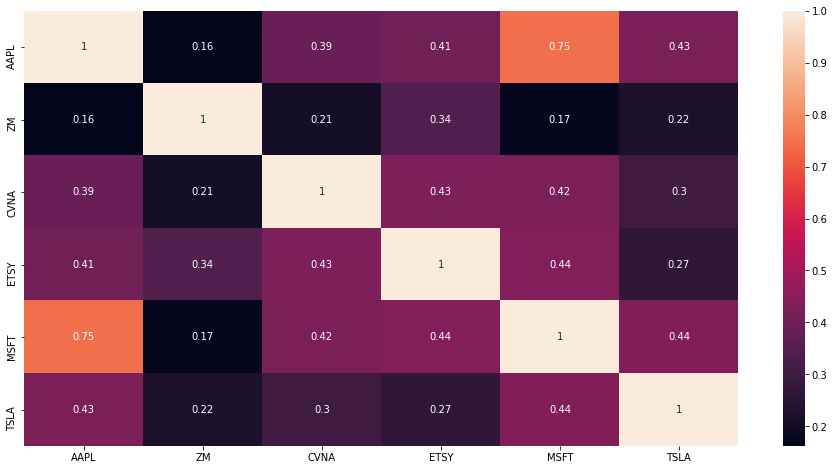

In [27]:
sns.heatmap(corr, annot=True)

In [28]:
#volatility and average returns of each stock in our portfolio
volatility = log_returns.std() * np.sqrt(252)
avg_returns = (prf_returns-1).mean()
portfolio_df['Volatility'] = volatility.values
portfolio_df['Avg_returns'] = avg_returns.values

In [30]:
portfolio_df

,Company_name,Company_Ticker,Discrete_val_25000,Volatility,Avg_returns
0,Apple Inc.,AAPL,27,0.317251,0.001668
1,"Zoom Video Communications, Inc.",ZM,20,0.726963,0.004435
2,Carvana Co.,CVNA,11,0.814790,0.004567
3,"Etsy, Inc.",ETSY,23,0.571230,0.003377
4,Microsoft Corporation,MSFT,8,0.286563,0.001538
5,"Tesla, Inc.",TSLA,6,0.621956,0.003421


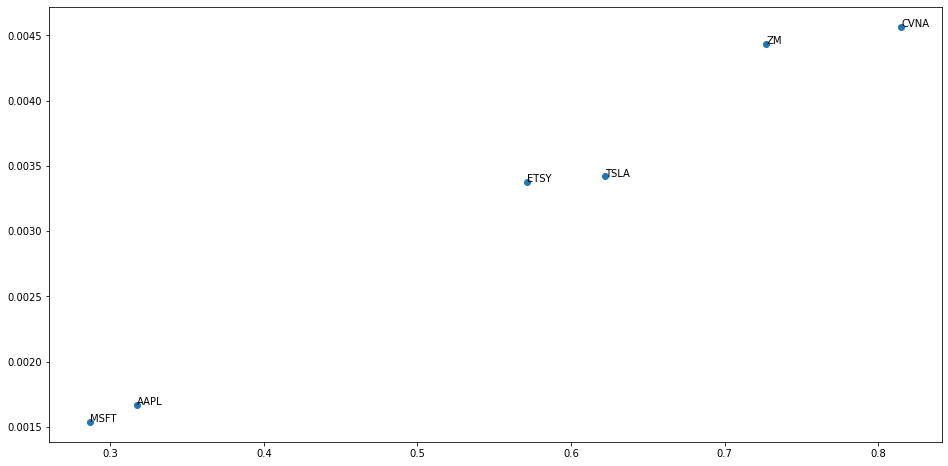

In [37]:
fig, ax = plt.subplots()
ax.scatter(volatility, avg_returns)

for i, txt in enumerate(prf_stocks):
  ax.annotate(txt, (volatility[i], avg_returns[i]))

# Bootstrap




In [38]:
#Time to make some forward simulation
simulated = pd.DataFrame([((prf_returns.iloc[random.choices(range(len(prf_returns)), k=60)]).mean(axis=1)).cumprod().values
                          for x in range(1000)]).T
simulated.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,1.030957,1.001023,0.999497,1.040104,1.018070,1.001501,1.013670,1.011521,0.985655,1.003769,0.990085,0.996345,1.022520,1.031011,1.008806,0.990437,1.006712,1.010529,1.002742,0.988626,1.000872,0.984794,1.046048,0.990085,1.016133,1.006475,1.021229,1.012226,1.015895,1.034427,1.019480,1.015570,1.032961,0.992484,0.979712,0.992484,1.030227,1.027512,0.997508,1.005680,...,1.027510,1.011521,0.980265,1.001069,1.012817,0.987907,1.017057,1.005680,1.000014,0.978311,0.972405,0.995673,0.998272,1.009989,1.014537,1.033737,1.005421,0.996885,1.004258,0.998716,0.979712,0.991145,0.994175,0.996393,0.987537,1.012602,1.006058,0.967373,0.982403,1.011521,1.011226,1.010566,1.017391,0.991403,1.034984,0.982026,0.996326,0.988891,1.009423,1.004258
1,1.061931,0.996128,1.048482,1.038660,1.005569,0.980267,1.002166,1.027219,0.961968,0.981197,1.006973,0.989097,1.024056,1.066756,1.010639,0.991351,1.010224,0.976459,1.012817,1.000449,0.996264,0.989641,1.035024,1.054821,1.019507,1.041707,1.013399,1.024983,1.028618,1.050317,1.033570,1.044418,1.033889,0.988992,0.983392,1.002275,1.027785,1.017685,1.006444,0.992242,...,1.069794,1.036181,0.994515,0.916412,0.979047,0.993620,1.038825,0.995643,1.037549,0.997030,0.983632,0.999177,0.984437,1.025855,1.047978,1.026629,1.021252,1.040671,1.008044,1.002231,0.986069,0.992218,1.033725,1.026003,1.005841,1.016166,1.052510,0.985940,1.009594,1.012884,1.014598,1.011749,1.025876,1.009112,1.018255,0.988485,0.998917,0.988114,1.006824,1.028282
2,1.076047,0.996142,1.090193,1.052684,1.007107,0.997821,1.038329,1.051174,0.956283,1.021576,1.020279,0.988748,1.030110,1.087652,1.016587,1.000927,0.924792,0.967710,1.027521,0.972327,0.987397,0.985284,1.000005,1.045499,1.033807,1.015838,1.012303,0.993089,1.050515,1.079250,1.039206,1.126068,1.012145,1.008480,0.990012,0.964636,1.040658,1.035979,0.974472,0.972660,...,1.065540,1.042173,0.995790,0.919832,0.969340,1.002781,1.092006,0.986844,1.052109,1.011282,0.982267,1.009696,0.991559,1.031367,1.090006,1.039299,1.032744,1.038925,0.977303,1.035266,0.994787,1.002978,1.032801,1.067150,0.977567,1.030653,1.060524,1.004805,1.018496,1.007292,0.990890,1.019740,1.009213,1.086478,1.037934,1.017256,1.013419,0.966830,1.023086,1.048313
3,1.032602,0.994727,1.105921,1.054559,1.016188,1.025309,1.040196,1.041787,0.988545,1.017823,1.073731,0.985301,1.013379,1.080317,1.014054,0.986472,0.911190,0.945808,0.994230,0.989640,0.946839,1.000839,0.996029,1.026931,1.031289,1.017553,1.059837,0.994383,1.056961,1.069681,1.063680,1.133580,1.009029,0.996824,0.987545,0.953604,1.055671,1.038360,0.976449,0.967352,...,1.048233,1.020255,0.977226,0.919110,0.962054,1.002185,1.104294,1.006295,1.045305,1.007036,1.059023,1.021032,0.997755,1.018780,1.120032,1.063842,1.036095,1.040528,0.986912,1.042817,0.983633,1.028304,1.027100,1.084109,0.960639,1.029301,1.051407,0.983212,1.038948,1.060963,1.007325,1.021352,1.014599,1.111125,1.034700,1.014653,0.993608,0.970474,1.026314,1.050134
4,1.070743,1.020837,1.051677,1.032199,0.977883,1.014937,1.052637,1.048180,0.940059,1.042637,1.117967,0.986414,0.987546,1.082954,1.055831,1.002089,0.882262,0.969903,1.000556,0.992497,0.948408,0.988740,1.001340,1.080732,1.036788,1.015784,1.038335,0.913167,1.071232,1.047185,1.066106,1.222201,1.035644,0.988015,0.990931,0.966205,1.078004,1.022570,0.965500,0.957581,...,1.063178,1.039166,0.990001,0.892350,0.910477,1.006119,1.115332,1.035675,1.060116,1.010023,1.083047,1.030216,0.986432,1.008354,1.124663,1.085401,1.051957,1.066027,0.990171,1.012893,1.002907,1.010498,1.034298,1.089631,1.018483,1.011099,1.070457,0.979584,1.031739,0.947257,1.002400,1.017063,1.024275,1.117080,1.032543,0.986132,1.007774,0.977473,1.046149,1.070832


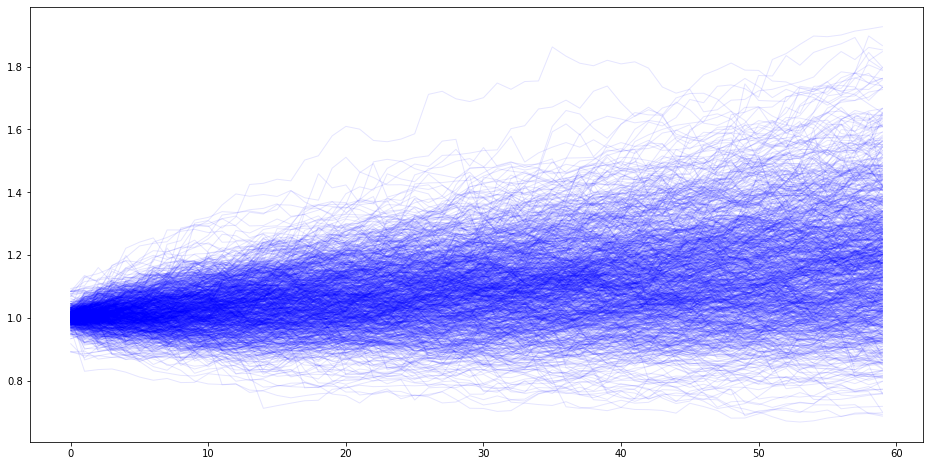

In [39]:
simulated.plot(legend=False, linewidth=1, alpha=0.1, color='blue')

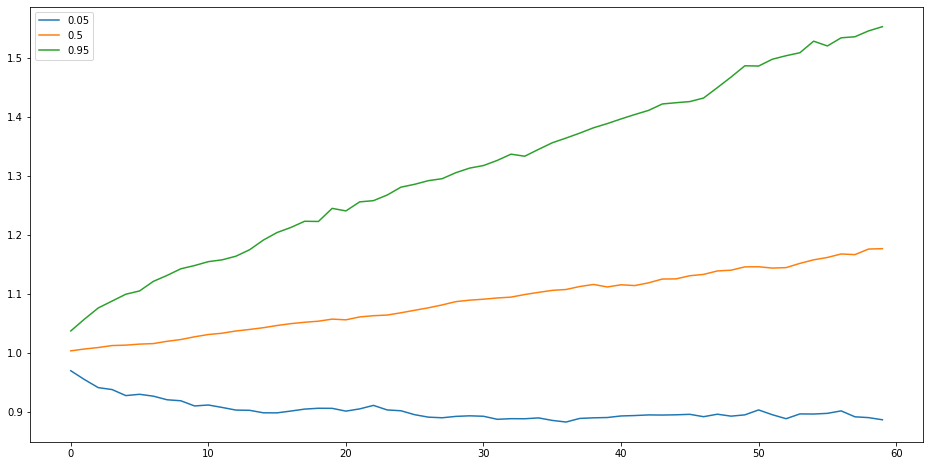

In [40]:
simulated.quantile([0.05, 0.50, 0.95], axis=1).T.plot()

About
Last updated: 2021-04-14

Created by: Oksana Kalytenko

Twitter: [@Oxanne_k](https://twitter.com/Oxanne_k)